In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [4]:
df = pd.read_csv('/content/final_internship_data.csv')

In [6]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [5]:
sum(df.duplicated(subset="key"))

0

In [7]:
print(df.isnull().sum())

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             1
nyc_dist             1
distance             1
bearing              1
dtype: int64


In [8]:
df = df.dropna()

In [9]:
df.drop('key', axis=1, inplace=True)   #key for a trip is unique so not needed by ML

In [10]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')


In [11]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,4.5,2009-06-15 17:26:21,-1.288826,0.710721,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,16.9,2010-01-05 16:52:16,-1.291824,0.710546,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,5.7,2011-08-18 00:35:00,-1.291242,0.711418,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,7.7,2012-04-21 04:30:42,-1.291319,0.710927,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,5.3,2010-03-09 07:51:00,-1.290987,0.711536,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [12]:
print(df.describe())

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  15361.000000      15361.000000     15361.000000       15361.000000   
mean      11.281788         -1.264763         0.696668          -1.264670   
std        9.637616          0.184556         0.119853           0.184777   
min       -3.000000         -1.299192        -1.291664          -1.299037   
25%        6.000000         -1.291407         0.710957          -1.291390   
50%        8.500000         -1.291224         0.711267          -1.291198   
75%       12.500000         -1.290965         0.711526          -1.290910   
max      180.000000          0.711503         7.000225           0.712137   

       dropoff_latitude  passenger_count          hour           day  \
count      15361.000000     15361.000000  15361.000000  15361.000000   
mean           0.696268         1.640974     13.488705     15.676323   
std            0.108519         1.265296      6.514219      8.685816   
min           -1.2

In [13]:
# Check for negative fare amounts
negative_fares = df[df['fare_amount'] < 0]
print("Negative Fare Amounts:")
print(negative_fares)

# Remove negative fares
df = df[df['fare_amount'] >= 0]



Negative Fare Amounts:
        User ID       User Name     Driver Name Car Condition Weather  \
2039   OzwKB5HX  Jeffrey Barton  Jacob Reynolds          Good  stormy   
2486   nNANxRio  Jessica Butler     Jason Booth           Bad   windy   
13032  4MipWnbO    Craig Harmon     Aimee Duran           Bad   sunny   

       Traffic Condition  fare_amount      pickup_datetime  pickup_longitude  \
2039   Congested Traffic         -2.9  2010-03-09 23:37:10         -1.287869   
2486        Flow Traffic         -2.5  2015-03-22 05:14:27         -1.291544   
13032  Congested Traffic         -3.0  2013-08-30 08:57:10         -1.291457   

       pickup_latitude  ...  month  weekday  year   jfk_dist   ewr_dist  \
2039          0.709363  ...      3        1  2010   1.846366  64.974364   
2486          0.710709  ...      3        6  2015  41.388169  29.116540   
13032         0.711060  ...      8        4  2013  42.914915  31.117678   

        lga_dist   sol_dist   nyc_dist  distance   bearing  
2

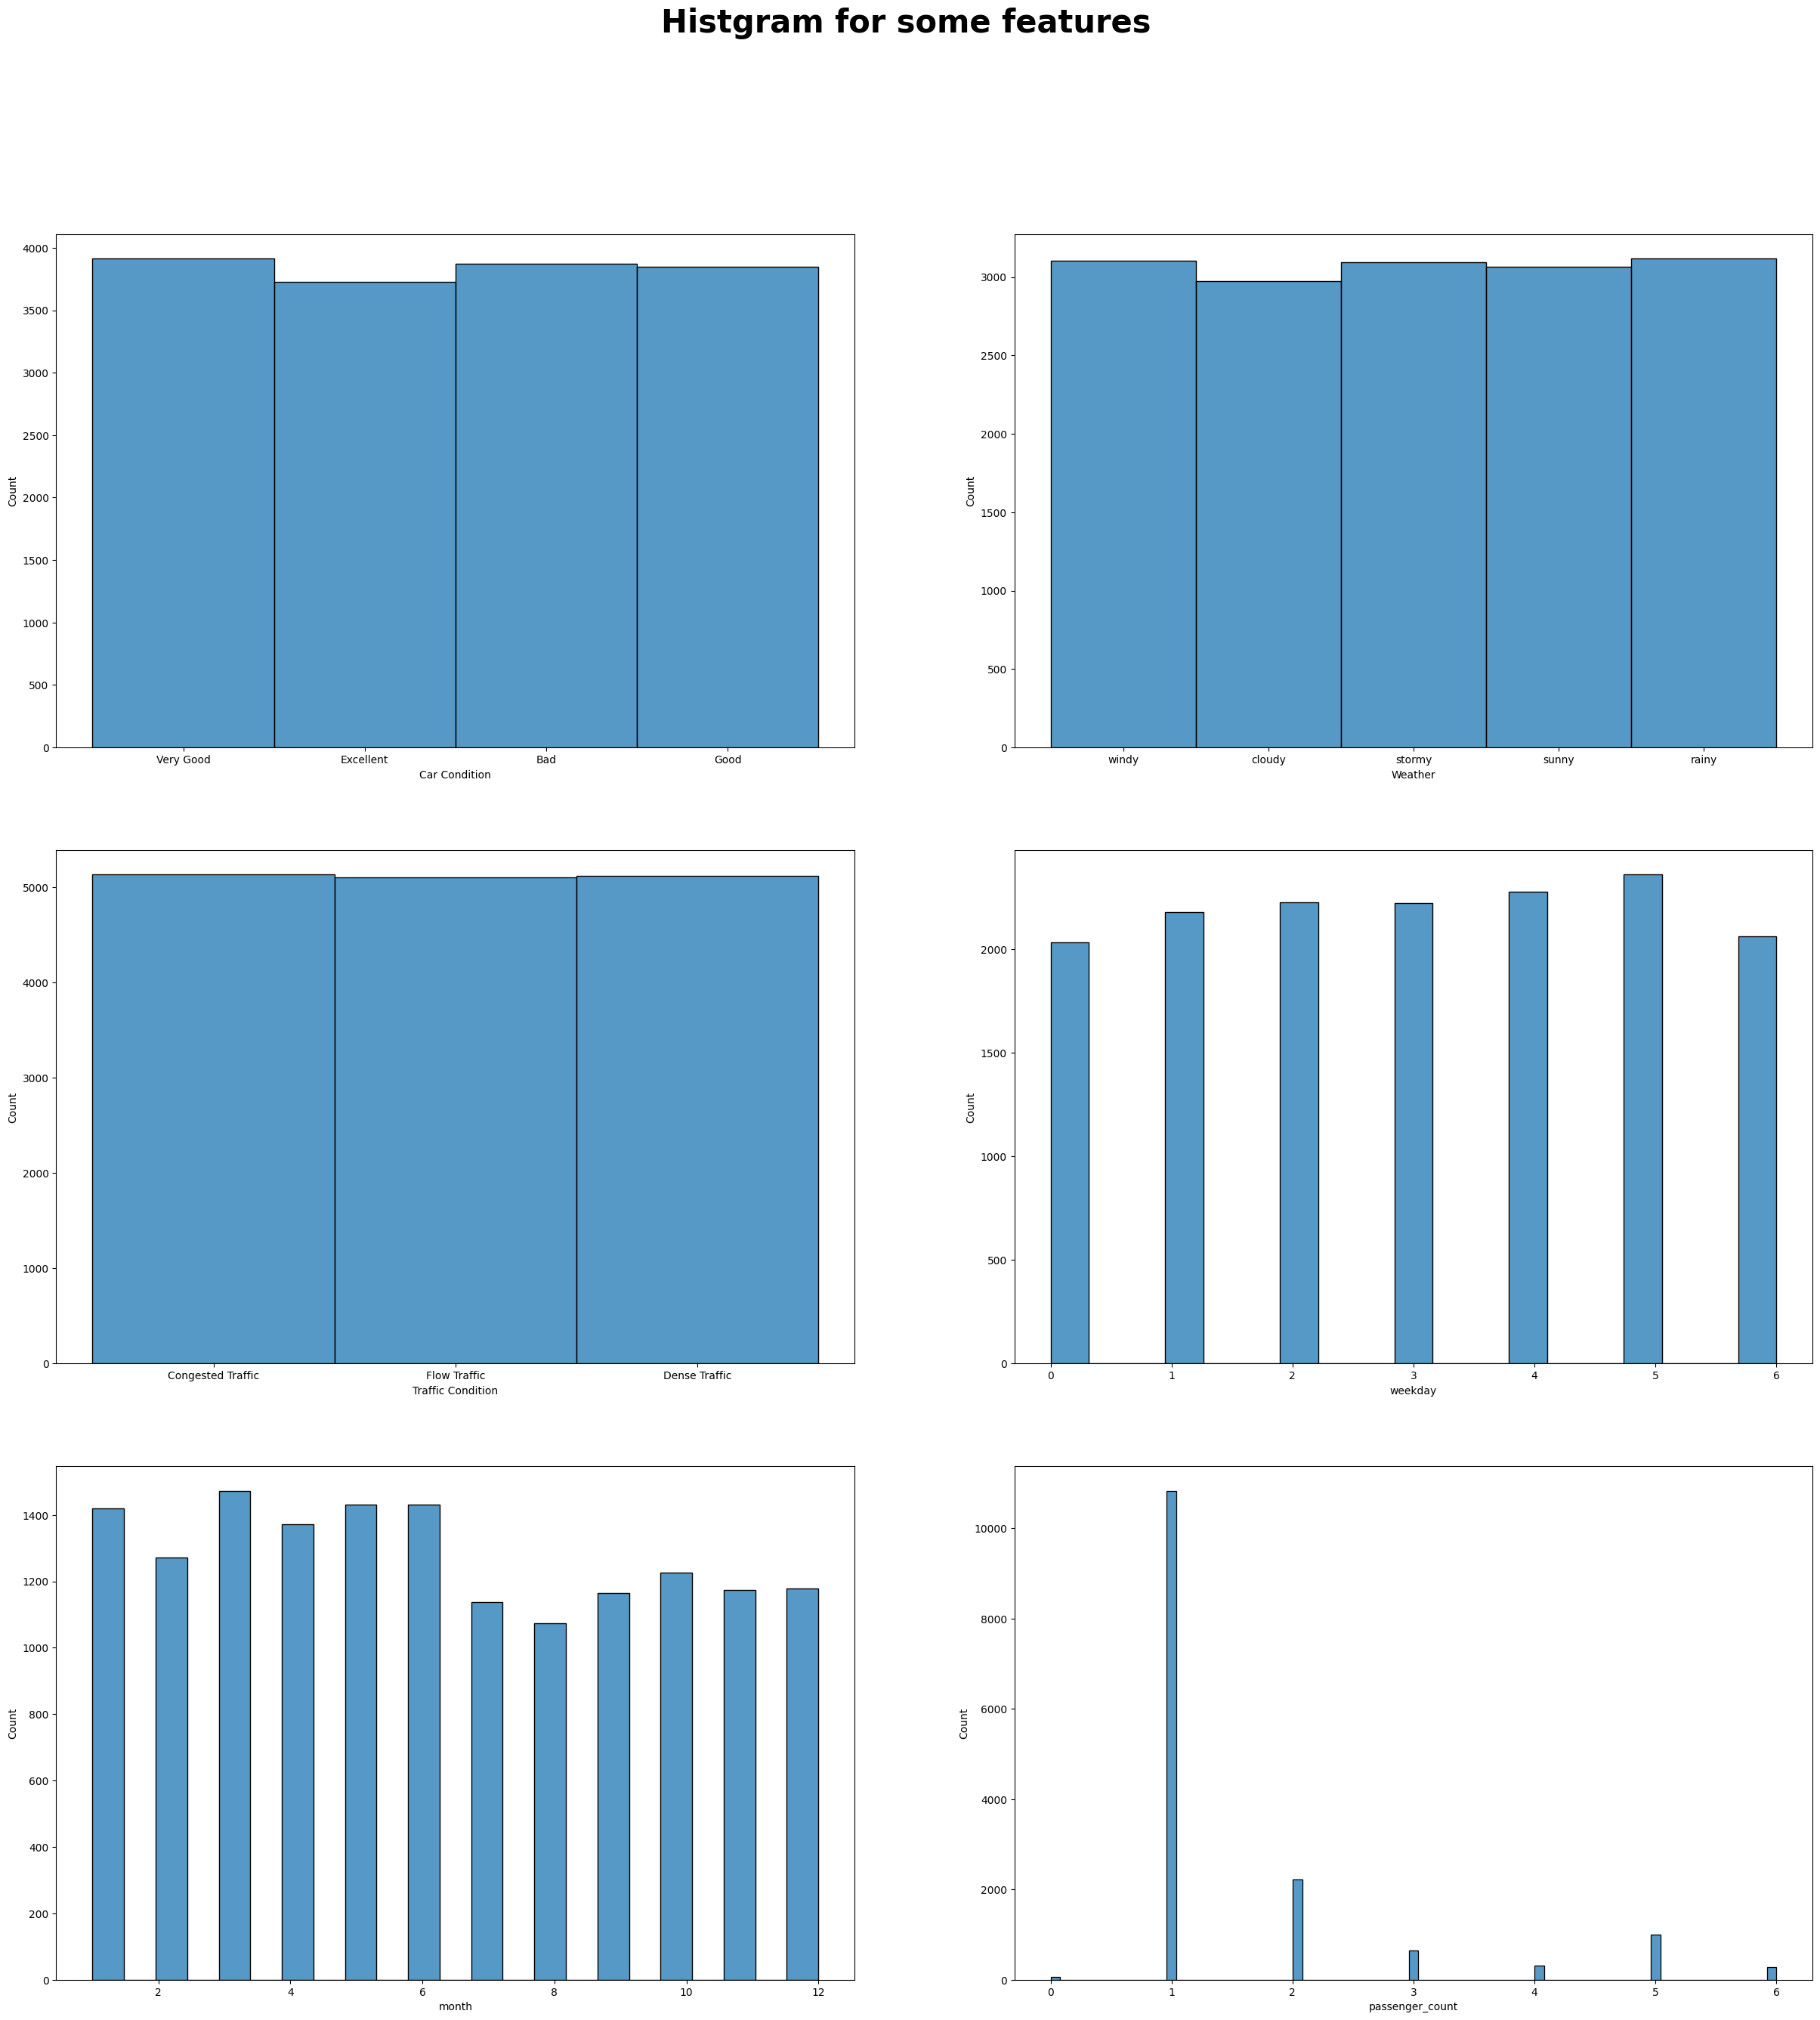

In [15]:
# Plotting histgram for some features

features = ['Car Condition', 'Weather', 'Traffic Condition', 'weekday', 'month', 'passenger_count']
counter = 0

plt.figure(figsize = (30, 30))
plt.suptitle("Histgram for some features",fontweight="bold", fontsize=30)
for feature in features:
    counter = counter + 1
    plt.subplot(3,2,counter)
    sns.histplot(df[feature])

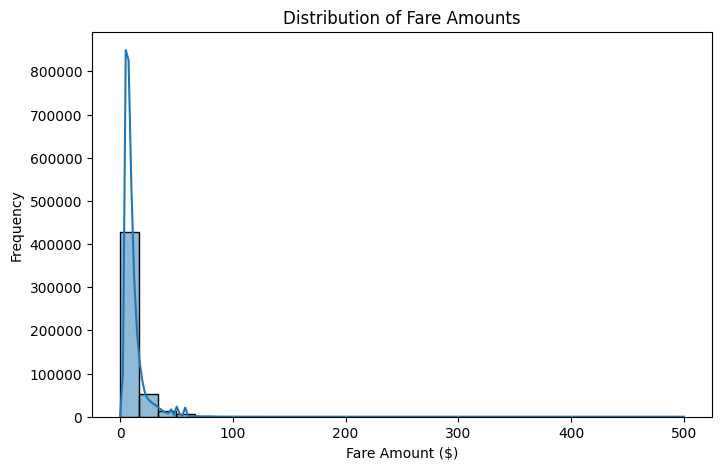

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amounts')
plt.show()


In [ ]:
from scipy import stats

# Compute Z-scores
df['fare_zscore'] = stats.zscore(df['fare_amount'])

# Set threshold (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = df[abs(df['fare_zscore']) > threshold]
print("Outliers:")
print(outliers[['fare_amount', 'fare_zscore']])

# Remove outliers
df = df[abs(df['fare_zscore']) <= threshold]

# Drop the temporary z-score column
df = df.drop(columns=['fare_zscore'])

# Confirm removal
print(f"\nNumber of rows after removing outliers: {len(df)}")


Outliers:
        fare_amount  fare_zscore
35            58.00     4.703892
105           52.00     4.098774
132           49.57     3.853701
147           52.50     4.149200
204           42.50     3.140670
...             ...          ...
499905        49.57     3.853701
499944        43.07     3.198157
499965        42.80     3.170926
499977        49.57     3.853701
499979        49.80     3.876897

[13324 rows x 2 columns]

Number of rows after removing outliers: 486650


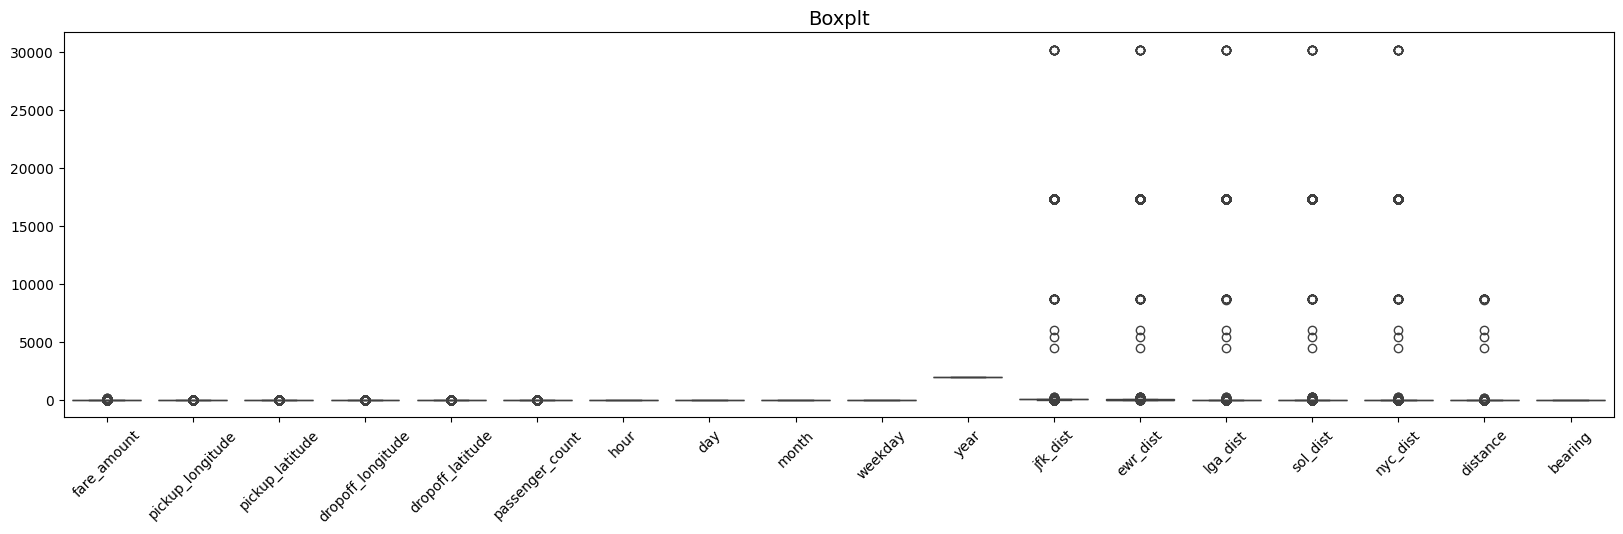

In [16]:
# plot outliers before treating
plt.figure(figsize=(20, 5))  # Wider figure to fit all columns
sns.boxplot(data = df)
plt.xticks(rotation = 45)  # Rotate x-axis labels for clarity
plt.title("Boxplt", fontsize = 14)
plt.show()

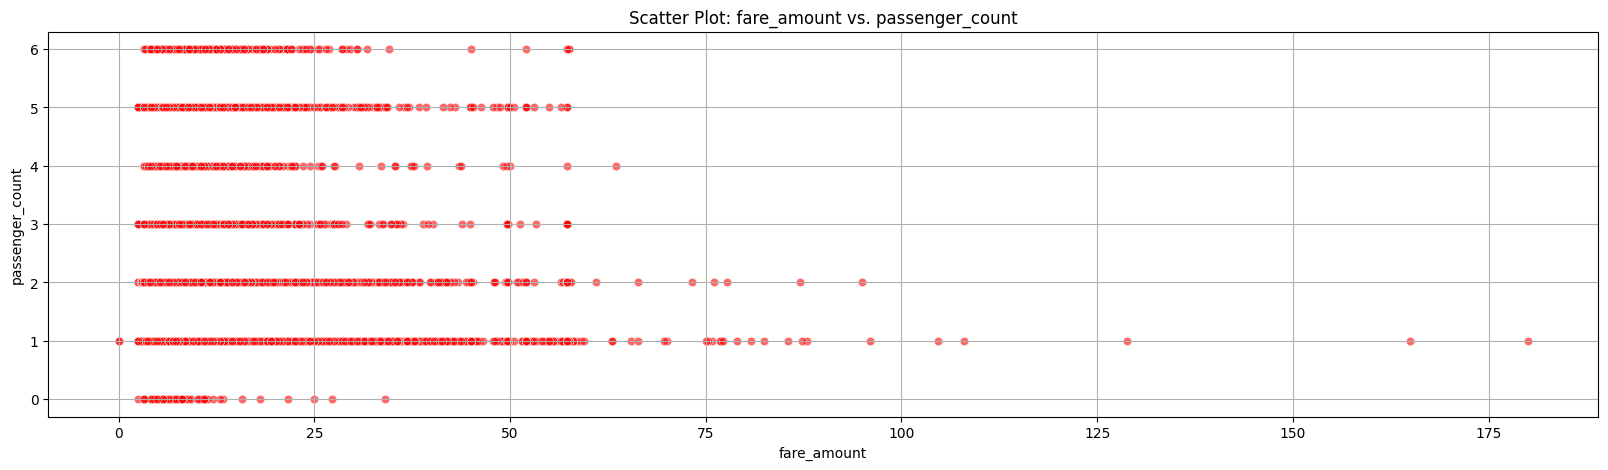

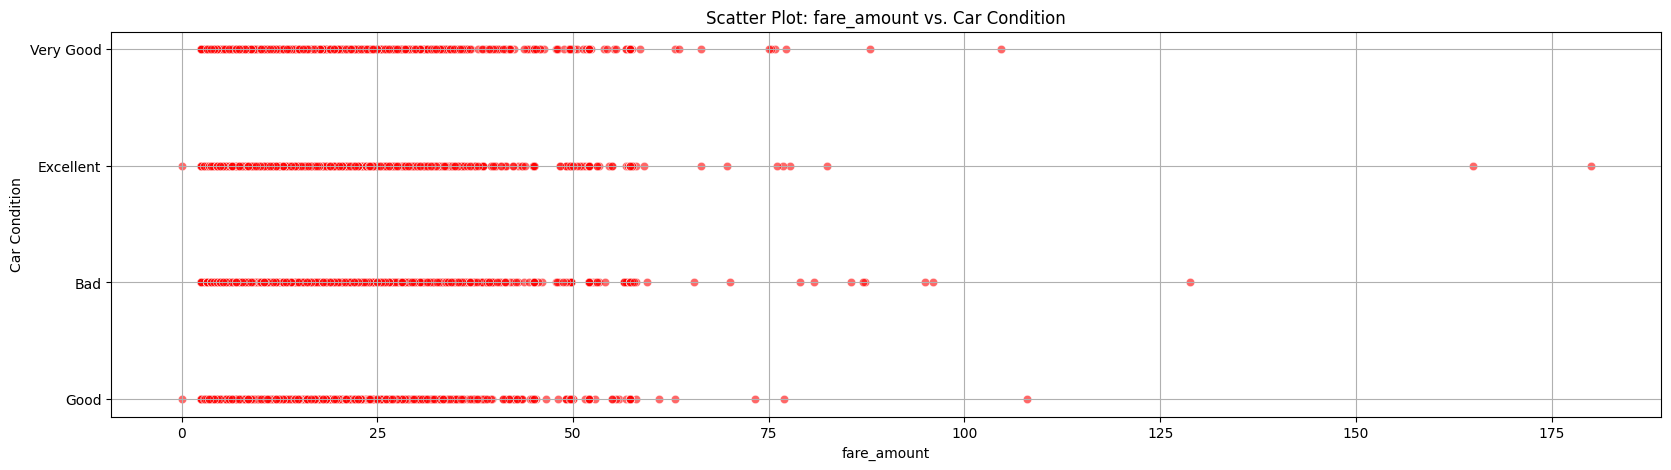

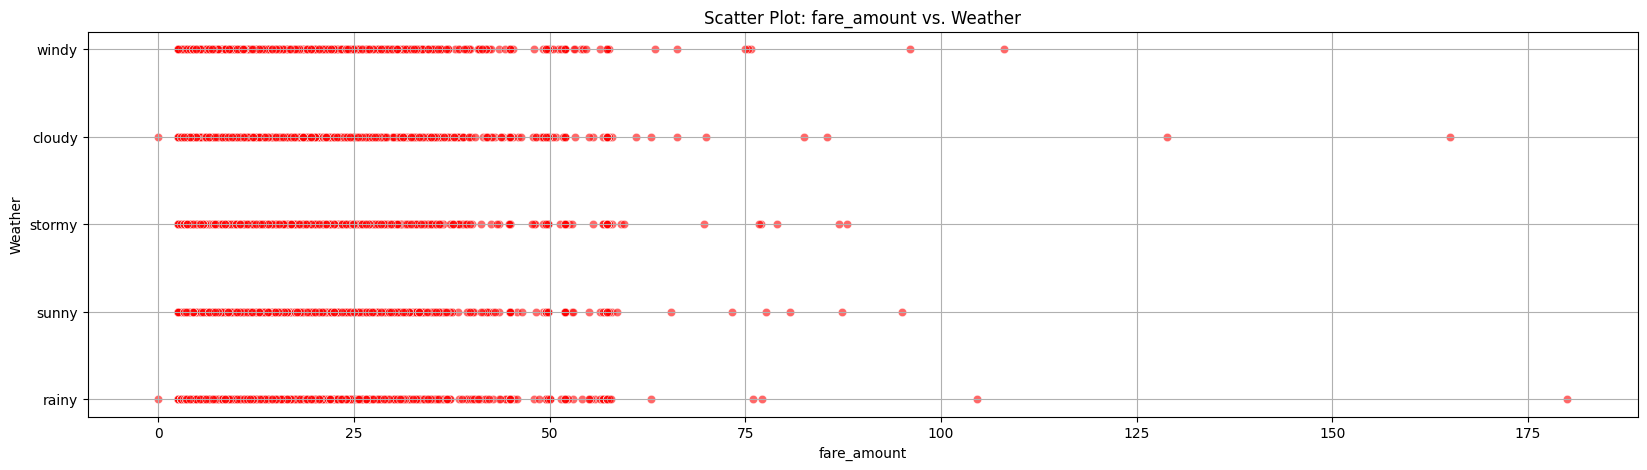

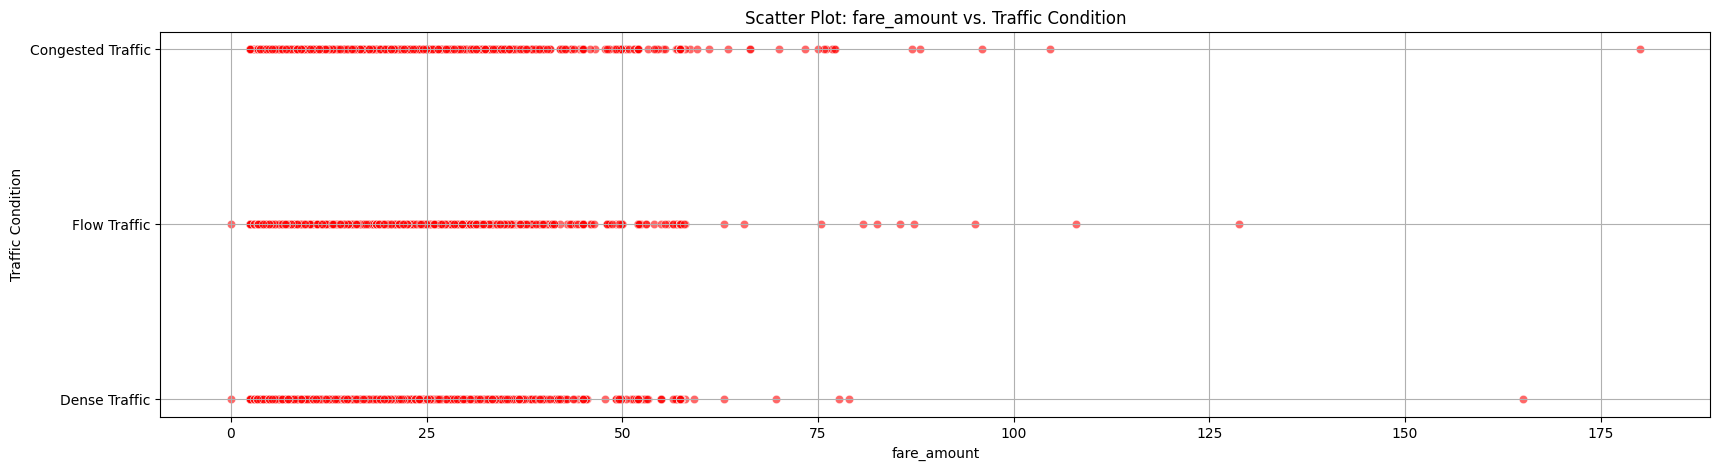

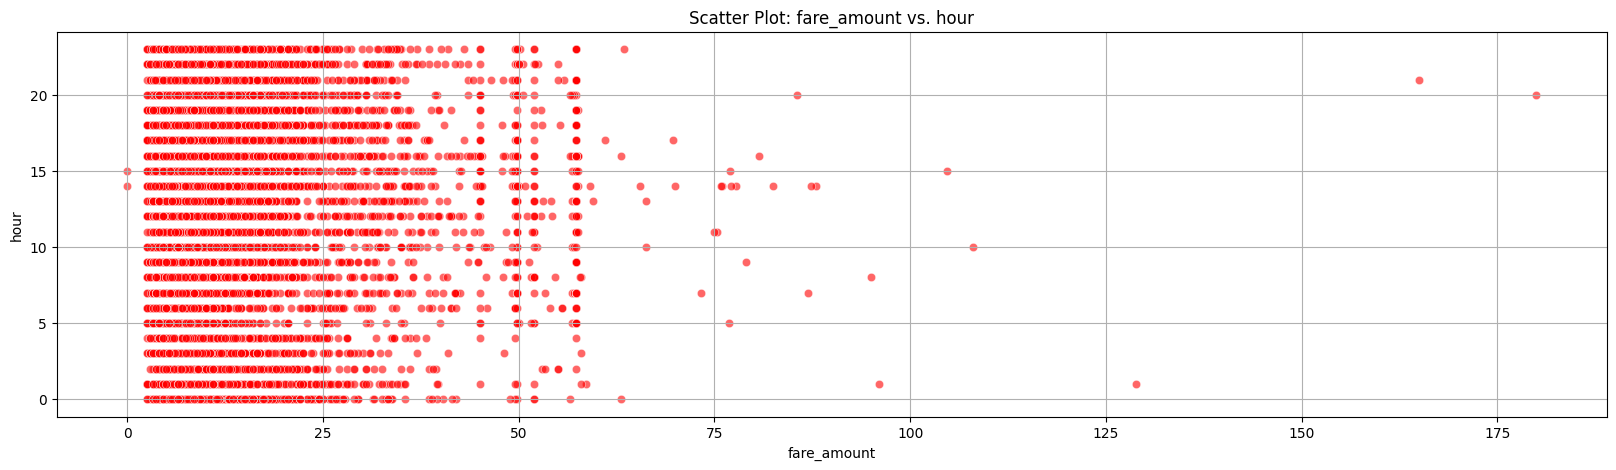

In [17]:
# Plotting scatter plot for some features agaist Fare amount

features = ['passenger_count', 'Car Condition', 'Weather', 'Traffic Condition', 'hour']

for feature in features:

    plt.figure(figsize=(20, 5))
    sns.scatterplot(x=df['fare_amount'], y=df[feature], alpha=0.6, color='red')

    # Titles and labels
    plt.title('Scatter Plot: fare_amount vs. {}'.format(feature))
    plt.xlabel('fare_amount')
    plt.ylabel(feature)
    plt.grid(True)

    plt.show()

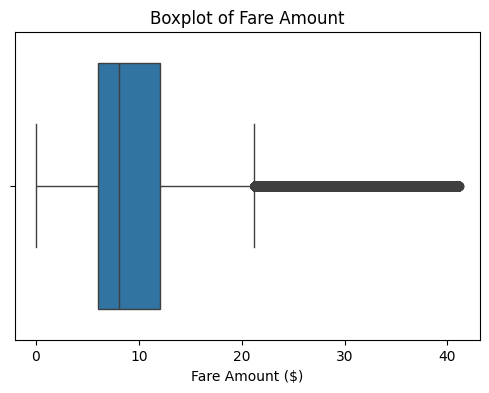

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['fare_amount'])
plt.xlabel('Fare Amount ($)')
plt.title('Boxplot of Fare Amount')
plt.show()


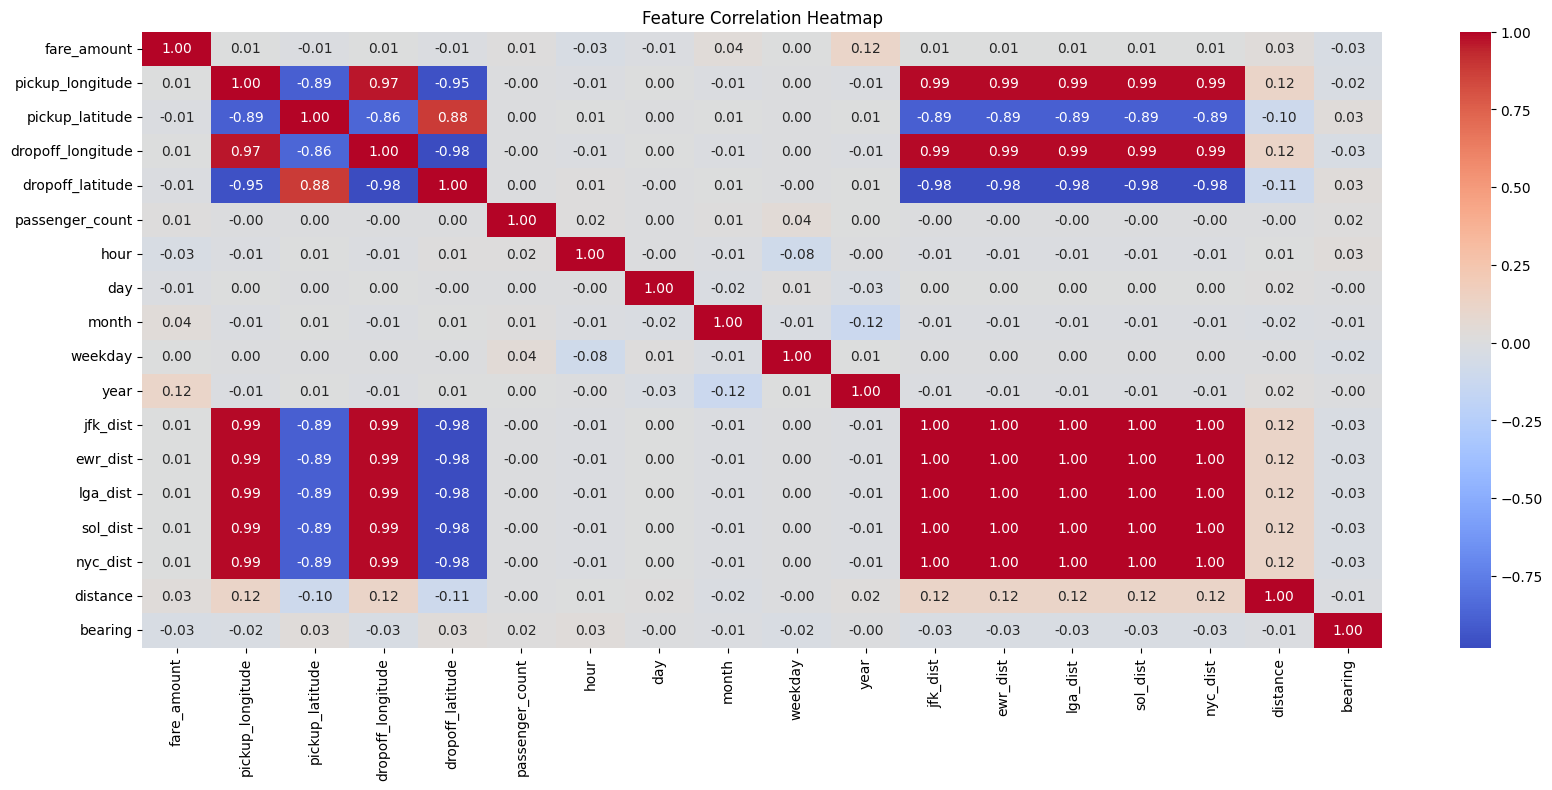

In [19]:
correlation_matrix = df.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    # Keep only numeric features
    numeric_df = df.select_dtypes(include=[float, int])
    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_df.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

vif_df = calculate_vif(df)
print(vif_df)


              feature           VIF
0         fare_amount  3.705330e+00
1    pickup_longitude  1.564915e+05
2     pickup_latitude  1.902613e+02
3   dropoff_longitude  7.502612e+04
4    dropoff_latitude  1.653039e+04
5     passenger_count  2.689807e+00
6                hour  5.347472e+00
7                 day  4.264056e+00
8               month  4.334389e+00
9             weekday  3.416499e+00
10               year  6.387597e+05
11           jfk_dist  4.889852e+05
12           ewr_dist  4.031127e+06
13           lga_dist  4.623077e+05
14           sol_dist  2.150838e+07
15           nyc_dist  1.155878e+07
16           distance  1.031236e+00
17            bearing  1.040053e+00


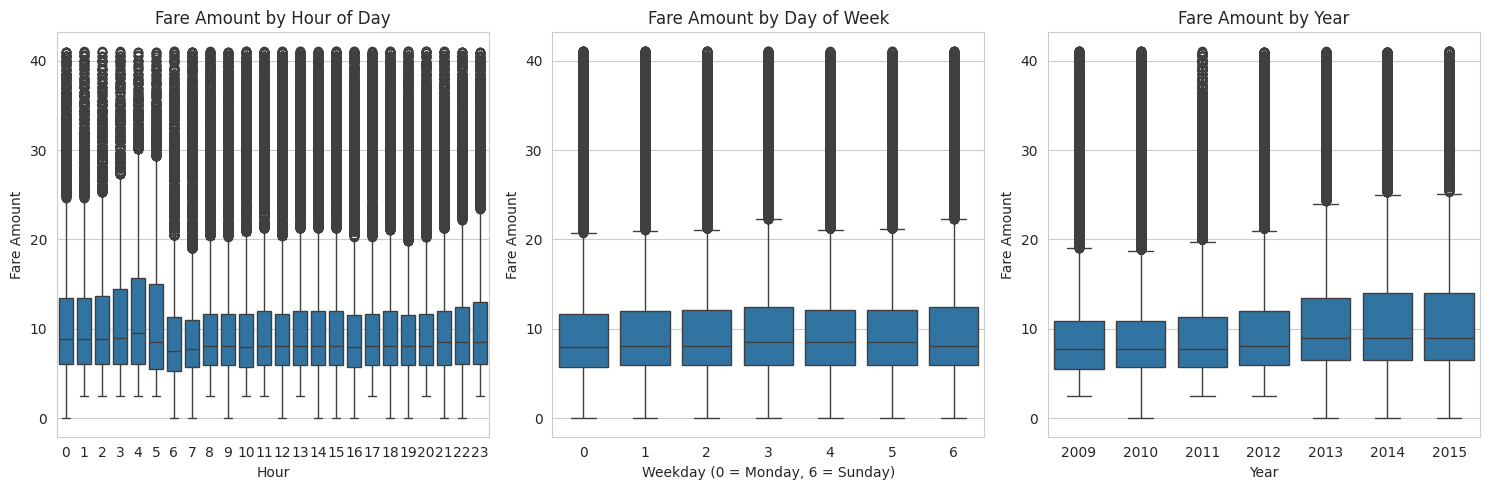

In [ ]:
# Set style
sns.set_style("whitegrid")

# Figure size
plt.figure(figsize=(15, 5))

# Hourly Fare Trend
plt.subplot(1, 3, 1)
sns.boxplot(x=df['hour'], y=df['fare_amount'])
plt.title("Fare Amount by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fare Amount")

# Daily Fare Trend
plt.subplot(1, 3, 2)
sns.boxplot(x=df['weekday'], y=df['fare_amount'])
plt.title("Fare Amount by Day of Week")
plt.xlabel("Weekday (0 = Monday, 6 = Sunday)")
plt.ylabel("Fare Amount")

# Yearly Fare Trend
plt.subplot(1, 3, 3)
sns.boxplot(x=df['year'], y=df['fare_amount'])
plt.title("Fare Amount by Year")
plt.xlabel("Year")
plt.ylabel("Fare Amount")

plt.tight_layout()
plt.show()

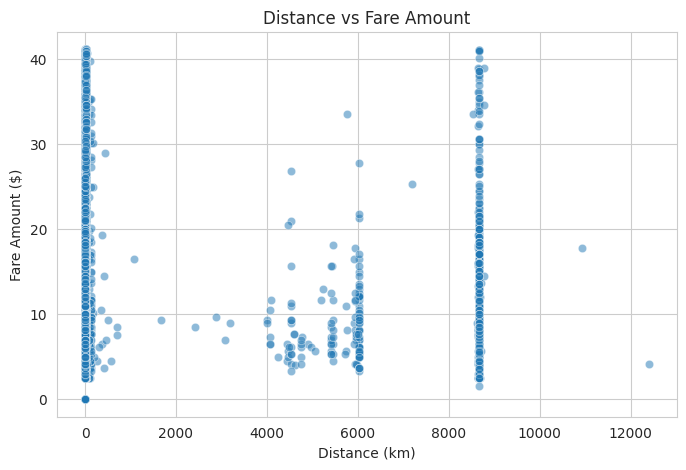

In [ ]:
# Scatter plot of distance vs fare amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['distance'], y=df['fare_amount'], alpha=0.5)

plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()


In [ ]:
# Calculate Z-score for distance
df['distance_zscore'] = (df['distance'] - df['distance'].mean()) / df['distance'].std()

# Keep only data points where Z-score is within [-3, 3]
df_cleaned = df[(df['distance_zscore'] >= -3) & (df['distance_zscore'] <= 3)]

# Drop the temporary Z-score column
df_cleaned = df_cleaned.drop(columns=['distance_zscore'])

# Display results
print(f"Original dataset size: {df.shape[0]} rows")
print(f"After removing outliers: {df_cleaned.shape[0]} rows")

# If needed, update df to the cleaned one
df = df_cleaned

Original dataset size: 486650 rows
After removing outliers: 485765 rows


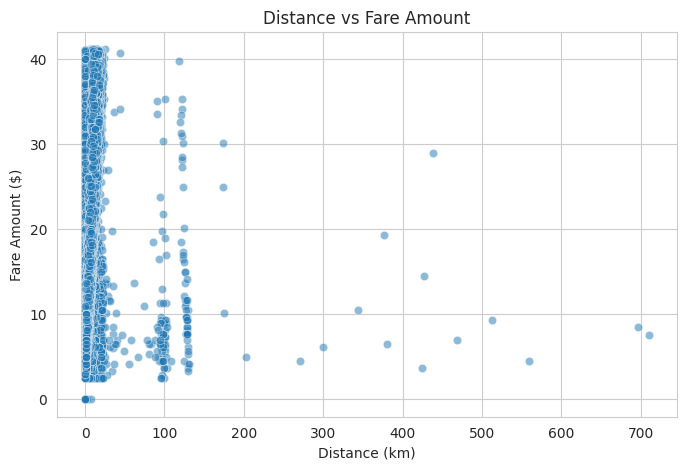

In [ ]:
# Scatter plot of distance vs fare amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['distance'], y=df['fare_amount'], alpha=0.5)

plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()

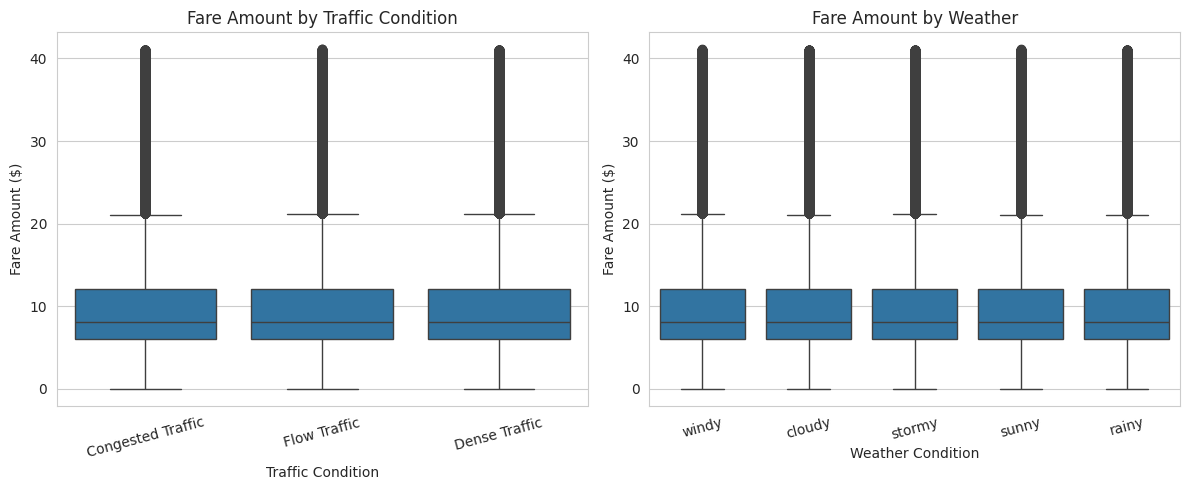

In [ ]:
# Boxplot: Fare Amount by Traffic Condition
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Traffic Condition'], y=df['fare_amount'])
plt.title("Fare Amount by Traffic Condition")
plt.xlabel("Traffic Condition")
plt.ylabel("Fare Amount ($)")
plt.xticks(rotation=15)

# Boxplot: Fare Amount by Weather
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Weather'], y=df['fare_amount'])
plt.title("Fare Amount by Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Fare Amount ($)")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


In [ ]:
# Compute fare per km (Avoid division by zero)
df['fare_per_km'] = df['fare_amount'] / df['distance']
df['fare_per_km'] = df['fare_per_km'].replace([np.inf, -np.inf], np.nan)  # Handle division errors

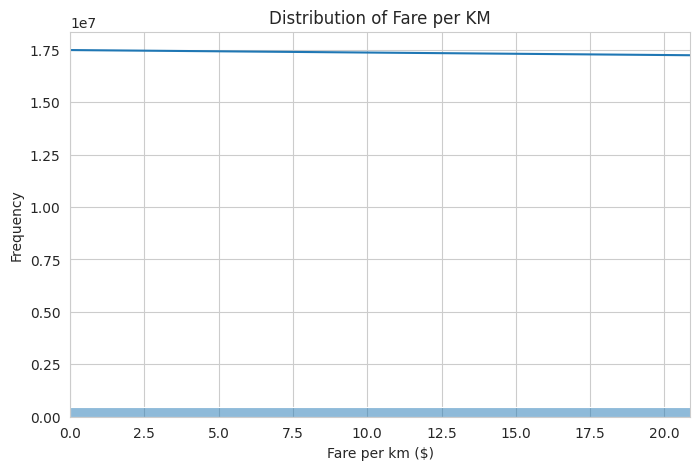

In [ ]:
# Plot fare per km
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_per_km'], bins=50, kde=True)
plt.xlabel("Fare per km ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Fare per KM")
plt.xlim(0, df['fare_per_km'].quantile(0.99))  # Remove extreme values
plt.show()


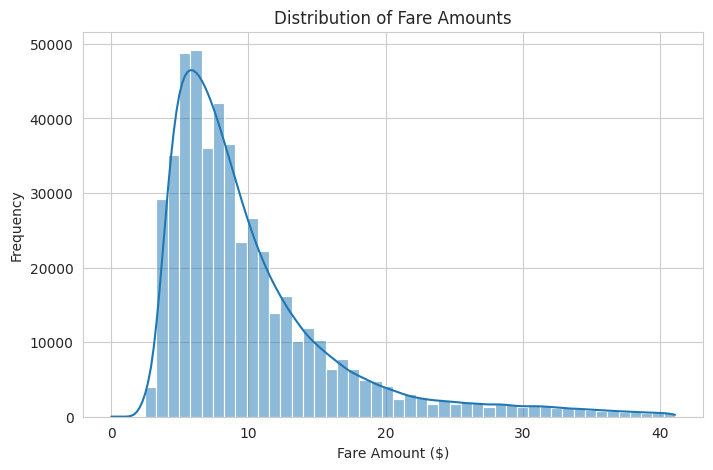

In [ ]:
# Plot the distribution of fare amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Fare Amounts")
plt.show()


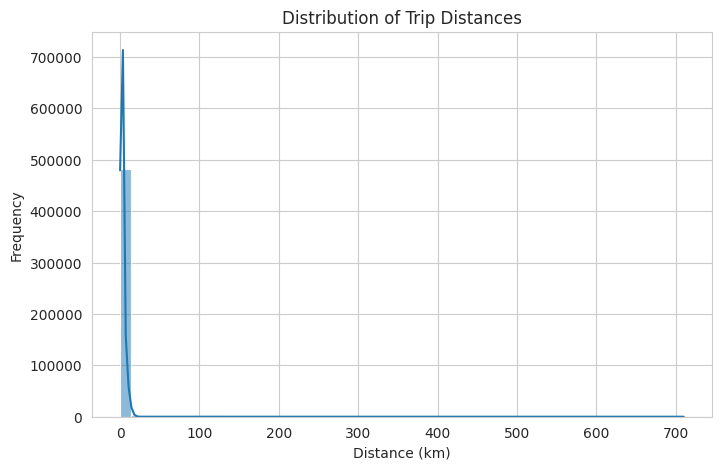

In [ ]:
# Plot the distribution of distances
plt.figure(figsize=(8, 5))
sns.histplot(df['distance'], bins=50, kde=True)
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distances")
plt.show()


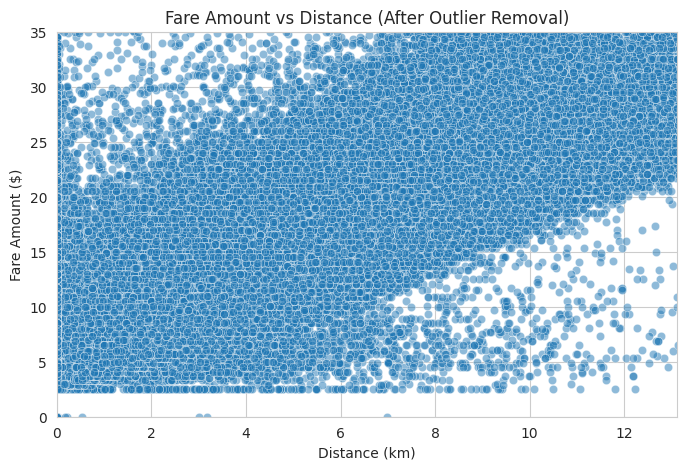

In [ ]:
# Improved scatter plot with limits
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['distance'], y=df['fare_amount'], alpha=0.5)
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Distance (After Outlier Removal)")
plt.ylim(0, df['fare_amount'].quantile(0.99))  # Remove extreme fare values
plt.xlim(0, df['distance'].quantile(0.99))  # Remove extreme distance values
plt.show()


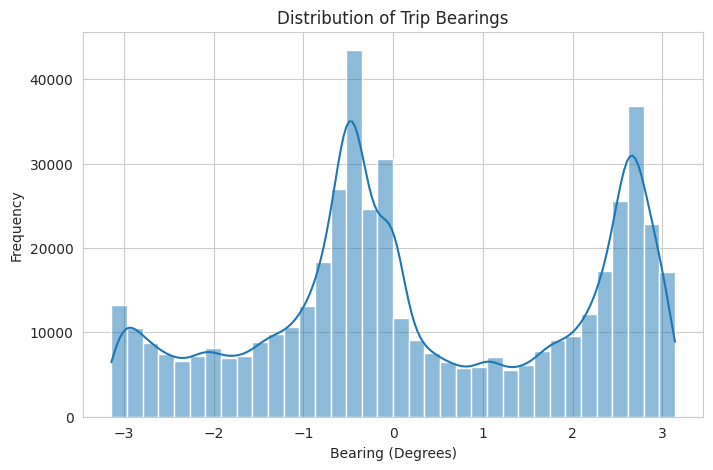

In [ ]:
# Plot bearing distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['bearing'], bins=36, kde=True)  # 36 bins = 10-degree intervals
plt.xlabel("Bearing (Degrees)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Bearings")
plt.show()


<ipython-input-39-26225002075f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drivers.values, y=top_drivers.index, palette="viridis")


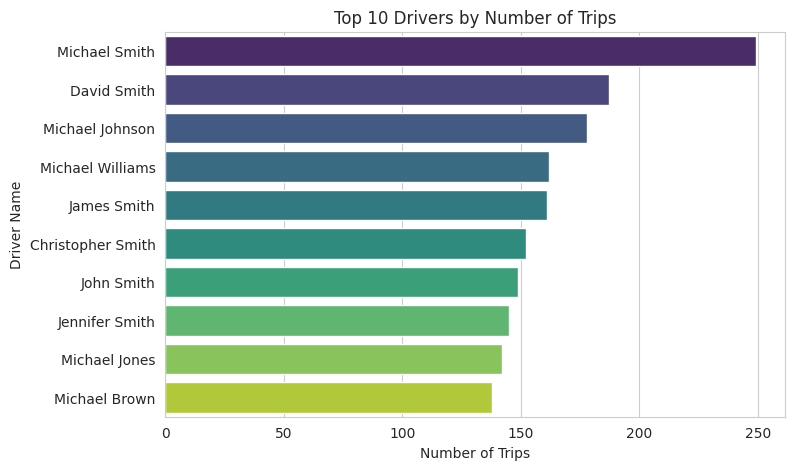

In [ ]:
# Count trips per driver
top_drivers = df['Driver Name'].value_counts().head(10)

# Bar plot of top drivers
plt.figure(figsize=(8, 5))
sns.barplot(x=top_drivers.values, y=top_drivers.index, palette="viridis")
plt.xlabel("Number of Trips")
plt.ylabel("Driver Name")
plt.title("Top 10 Drivers by Number of Trips")
plt.show()


<ipython-input-41-450fe1d7d48a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driver_fares.values, y=driver_fares.index, palette="coolwarm")


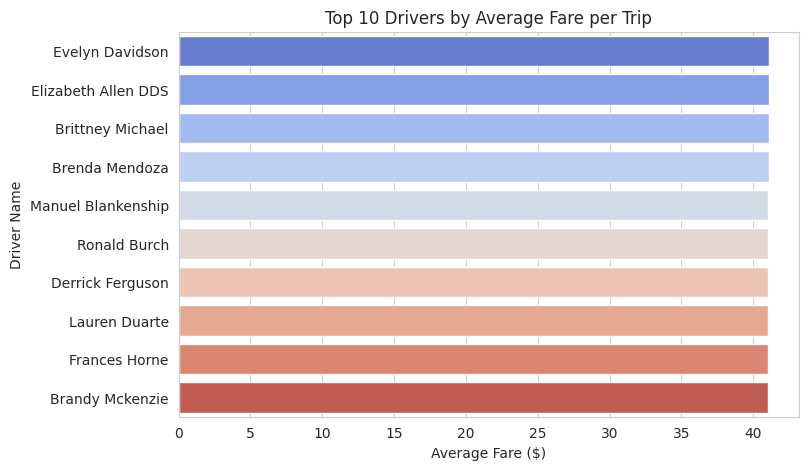

In [ ]:
# Calculate average fare per driver
driver_fares = df.groupby('Driver Name')['fare_amount'].mean().sort_values(ascending=False).head(10)

# Bar plot of avg fares per driver
plt.figure(figsize=(8, 5))
sns.barplot(x=driver_fares.values, y=driver_fares.index, palette="coolwarm")
plt.xlabel("Average Fare ($)")
plt.ylabel("Driver Name")
plt.title("Top 10 Drivers by Average Fare per Trip")
plt.show()


<ipython-input-43-59197dbe49bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driver_earnings.values, y=driver_earnings.index, palette="magma")


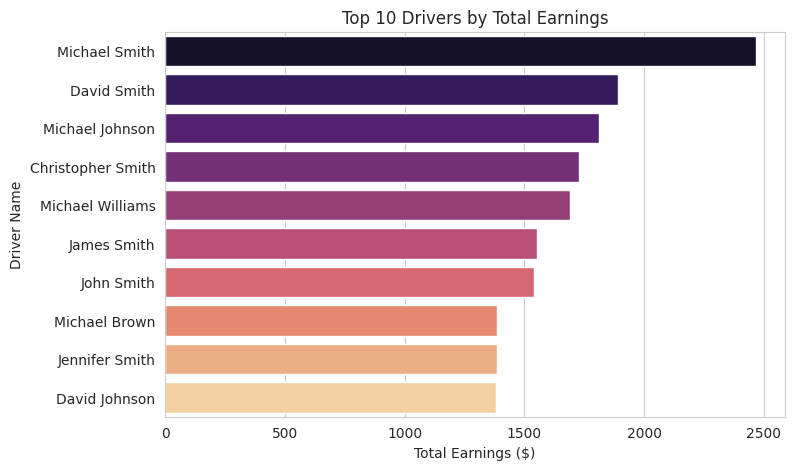

In [ ]:
# Total earnings per driver
driver_earnings = df.groupby('Driver Name')['fare_amount'].sum().sort_values(ascending=False).head(10)

# Bar plot of total earnings per driver
plt.figure(figsize=(8, 5))
sns.barplot(x=driver_earnings.values, y=driver_earnings.index, palette="magma")
plt.xlabel("Total Earnings ($)")
plt.ylabel("Driver Name")
plt.title("Top 10 Drivers by Total Earnings")
plt.show()
